<a href="https://colab.research.google.com/github/jungwonalicia/bigdata/blob/master/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 15s 258us/step - loss: 0.2018 - acc: 0.9407
Epoch 2/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.0808 - acc: 0.9752
Epoch 3/5
60000/60000 [==============================] - 14s 239us/step - loss: 0.0527 - acc: 0.9836
Epoch 4/5
60000/60000 [==============================] - 14s 240us/step - loss: 0.0360 - acc: 0.9889
Epoch 5/5
10000/10000 [==============================] - 1s 54us/step


[0.06975381775800488, 0.9793]

In [5]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

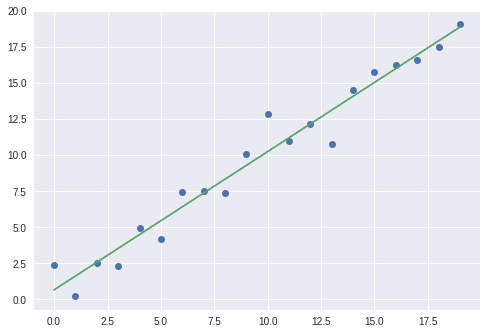

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

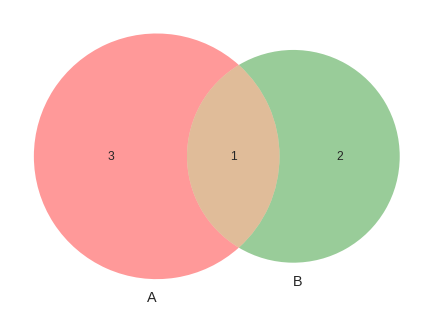

In [7]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

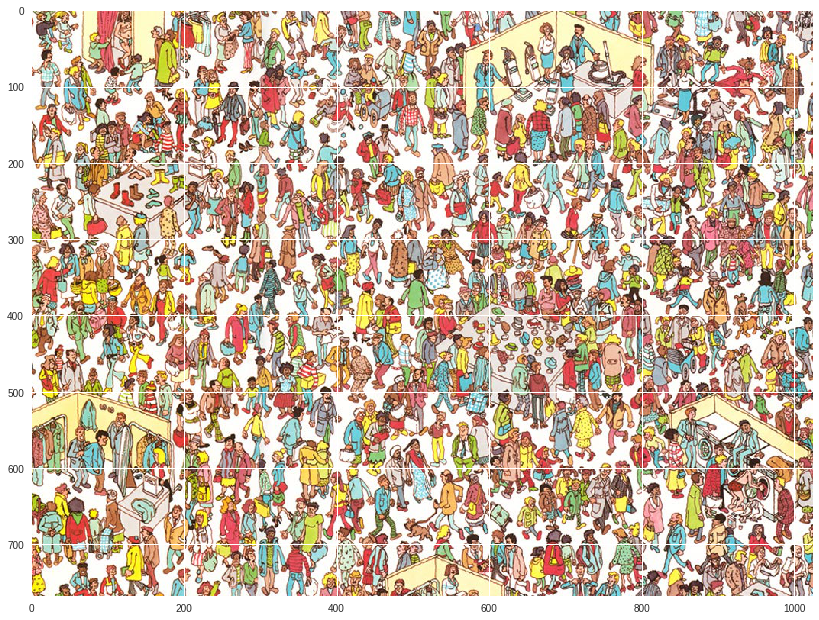

In [9]:
!pip install -q mahotas

import matplotlib.pyplot as plt
import mahotas as mh
%matplotlib inline

wally = mh.demos.load('Wally')

plt.figure(figsize=(14,14))
plt.imshow(wally)
plt.show()

In [10]:
import numpy as np

wfloat = wally.astype(float)
r,g,b = wfloat.transpose((2,0,1))
w = wfloat.mean(2)

pattern = np.ones((24,16), float)
for i in np.arange(2):
    pattern[i::4] = -1
    
pattern

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1

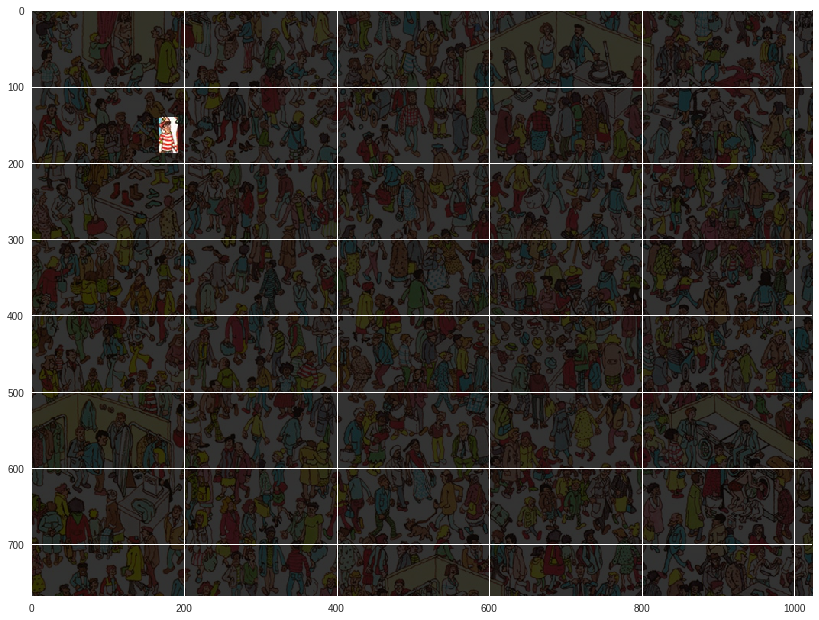

In [11]:
v = mh.convolve(r-w, pattern)
mask = (v == v.max())
mask = mh.dilate(mask, np.ones((48,24)))
np.subtract(wally, .8*wally * ~mask[:,:,None], out=wally, casting='unsafe')

plt.figure(figsize=(14,14))
plt.imshow(wally)
plt.show()